In [2]:
from math import factorial
from itertools import permutations

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def ccw(A,B,C):
    return (C.y-A.y) * (B.x-A.x) > (B.y-A.y) * (C.x-A.x)

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
    if A == C or A == D:
        return False
    if B == C or B == D:
        return False
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

In [4]:
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __repr__(self):
        return f"{self.x},{self.y}"
    def __str__(self):
        return f"{self.x},{self.y}"
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

In [5]:
def valid_permutation(points):
    segments = []
    for i in range(len(points)):
        p1, p2 = points[i-1], points[i]
        segments.append([p1,p2])
        
    for i in range(len(segments)):
        for j in range(i+1, len(segments)):
            s1 = segments[i]
            s2 = segments[j]
            if intersect(s1[0], s1[1], s2[0], s2[1]):
                return False
    return True

In [6]:
def run_simulation(size=4):
    X = np.random.random(size=size)
    Y = np.random.random(size=size)
    points = [Point(x,y) for x, y in zip(X.tolist(), Y.tolist())]
    starter = points[0]
    rest = points[1:]
    valid_perms = list()
    all_perms = list()
    for perm in permutations(rest, r=len(rest)):
        point_order = [starter] + list(perm)
        if valid_permutation(point_order):
            valid_perms.append(point_order)
        all_perms.append(point_order)
    return valid_perms

In [10]:
def plot_perm(points):
    my_points = points + [points[0]]
    X = [x.x for x in my_points]
    Y = [x.y for x in my_points]
    plt.plot(X, Y)

In [9]:
most_polygons = 0
all_shapes = None
for i in range(10_000):
    perms = run_simulation(size=6)
    total_poly = len(perms)//2
    if total_poly > most_polygons:
        most_polygons = total_poly
        print(total_poly)
        all_shapes = perms

13
24
29


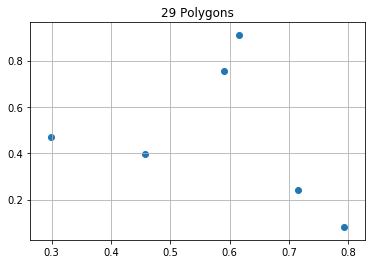

In [11]:
plt.grid()
plt.title("29 Polygons")
plt.scatter([x.x for x in all_shapes[0]], [x.y for x in all_shapes[0]])

In [12]:
most_polygons = 0
all_shapes = None
for i in range(10_000):
    perms = run_simulation(size=7)
    total_poly = len(perms)//2
    if total_poly > most_polygons:
        most_polygons = total_poly
        print(total_poly)
        all_shapes = perms

17
37
40
44
72
82
84
91
92


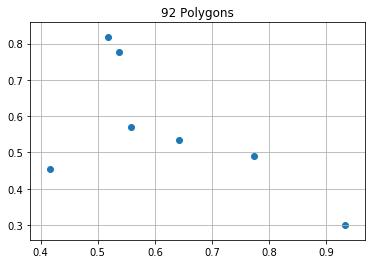

In [13]:
plt.grid()
plt.title("92 Polygons")
plt.scatter([x.x for x in all_shapes[0]], [x.y for x in all_shapes[0]])